In [28]:
# FS acoustic wave propagation plots using classical sum of sinusoids solution, 2017-01-17

# NOTE THIS IS NOT FINISHED !!!

%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [29]:
cs = 343              # Speed of sound in air, m/s.
nu = 10000            # A frequency in the human audible range, cycles/s
omega = 2*np.pi*nu    # Angular frequency in radians/s.
lambd = cs/nu         # Wavelength in m
k = 2*np.pi / lambd   # Wavenumber in radians/m

ps = 5 * 10**-8       # Reference particle speed in air m/s (not wave speed!)

x =  300 * ps         # Particle displacement for 20 * log10(300) = 50 dB sound pressure level 
                      #  ... normal conversation. Check this! Might be wrong!
                      #  ... but it shouldn't affect wave propagation.
t = 0.0
def u_p(t,x):
    R = 0.3
    return (R * np.cos((omega * t) - (k * x))) + ((1-R) * np.cos((omega * t) + (k * x)))

#threewavetime = 3 * 2 * np.pi *nu /cs# Angular distance of three waves.
threewavedist = 3 * 2 * np.pi *k# Angular distance of three waves.
samples = 100 # Number of moments in time we want to sample
distrange = np.linspace(0, threewavedist, samples) # Range of distance to show on plot

initialwaveshape =   np.linspace(0, 0, samples)
waveshape = initialwaveshape

<IPython.core.display.Javascript object>


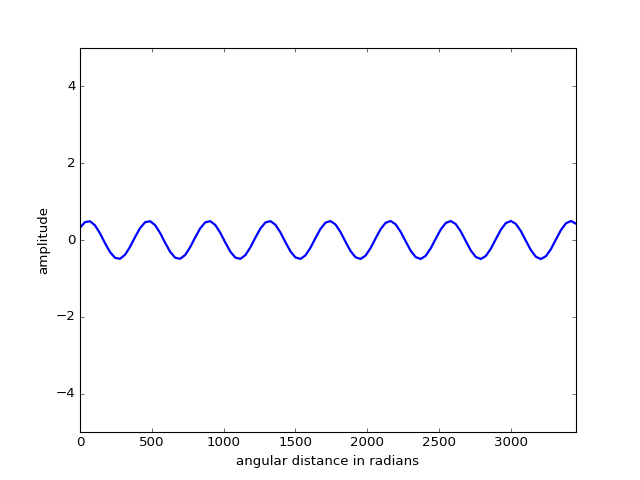

In [30]:
# Copied from an animation example on the web. The first one found with a Google search.
# I don't particularly like it but I don't want to spend ages writing a better one.

fig = plt.figure()
ax =  plt.axes(xlim=(0, threewavedist), ylim=(-5, +5))
ax.set_xlabel('angular distance in radians')
ax.set_ylabel('amplitude')

line, = ax.plot(distrange, u_p(distrange,t), lw=2)

# initialization function: plot the background of each frame

def init():
    line.set_data(distrange, u_p(distrange,t))
    return line,

# animation function.  This is called sequentially

def animate(i):
    t =  0.1 * i
    y = u_p((distrange),t)
    line.set_data(distrange, y)
    return line,



In [31]:
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=samples, interval=200, blit=True, repeat=False)
plt.show()
